# Bayesian Polynomial Regression

In [26]:
import numpy as np 
import arviz as az
import matplotlib.pyplot as plt 
import requests
import io 
import csv 
import pandas as pd

In [27]:
target_url = 'https://raw.githubusercontent.com/cfteach/brds/main/datasets/anscombe.csv' 

download = requests.get(target_url).content
ans = pd.read_csv(io.StringIO(download.decode('utf-8')))

x = ans[ans.group == 'II']['x'].values
y = ans[ans.group == 'II']['y'].values
x = x - x.mean()

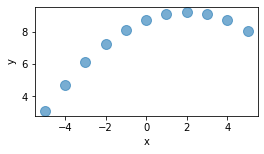

In [28]:
f=plt.figure()
f.set_figwidth(4)
f.set_figheight(2)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y,'C0.',alpha=0.6, markersize=20)

In [29]:
#!pip install pymc3

In [30]:
import pymc3 as pm

In [32]:
with pm.Model() as model_poly:
  alpha = pm.Normal('alpha',mu=y.mean(),sigma=1) 
  beta1 = pm.Normal('beta1',mu=0.,sigma=1) 
  beta2 = pm.Normal('beta2',mu=0.,sigma=1) 
  epsilon = pm.HalfCauchy('epsilon', 5)

  mu = pm.Deterministic('mu',alpha + beta1*x + beta2*x*x)

  y_pred = pm.Normal('y_pred', mu=mu, sigma = epsilon, observed = y)

  trace_poly = pm.sample(2000, tune = 2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta2, beta1, alpha]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>]], dtype=object)

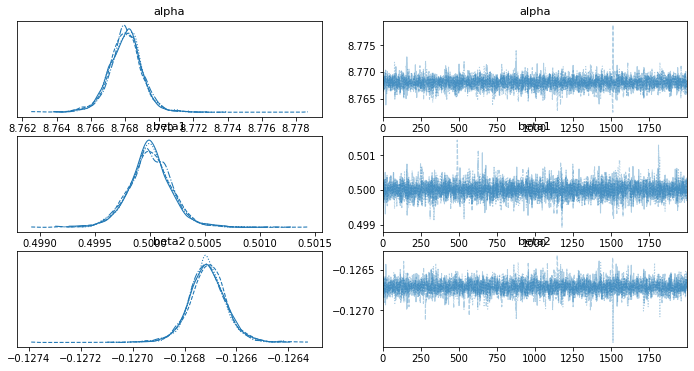

In [33]:
az.plot_trace(trace_poly, var_names = ['alpha','beta1','beta2'])

In [34]:
res = az.summary(trace_poly)
print(res)

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    8.768  0.001   8.766    8.770        0.0      0.0    3441.0   
beta1    0.500  0.000   0.500    0.500        0.0      0.0    4655.0   
beta2   -0.127  0.000  -0.127   -0.127        0.0      0.0    3274.0   
epsilon  0.002  0.001   0.001    0.003        0.0      0.0    2003.0   
mu[0]    9.141  0.001   9.140    9.143        0.0      0.0    3573.0   
mu[1]    8.141  0.001   8.139    8.143        0.0      0.0    3553.0   
mu[2]    8.741  0.001   8.739    8.743        0.0      0.0    5754.0   
mu[3]    8.768  0.001   8.766    8.770        0.0      0.0    3441.0   
mu[4]    9.261  0.001   9.260    9.263        0.0      0.0    4125.0   
mu[5]    8.100  0.002   8.097    8.103        0.0      0.0    4779.0   
mu[6]    6.128  0.001   6.126    6.129        0.0      0.0    5174.0   
mu[7]    3.100  0.002   3.097    3.103        0.0      0.0    4542.0   
mu[8]    9.128  0.001   9.126    9.129        0.0      0.0    54

In [35]:
tr_alpha = res.loc['alpha']
tr_beta1 = res.loc['beta1']
tr_beta2 = res.loc['beta2']

In [36]:
print(tr_alpha)

mean            8.768
sd              0.001
hdi_3%          8.766
hdi_97%         8.770
mcse_mean       0.000
mcse_sd         0.000
ess_bulk     3441.000
ess_tail     3313.000
r_hat           1.000
Name: alpha, dtype: float64


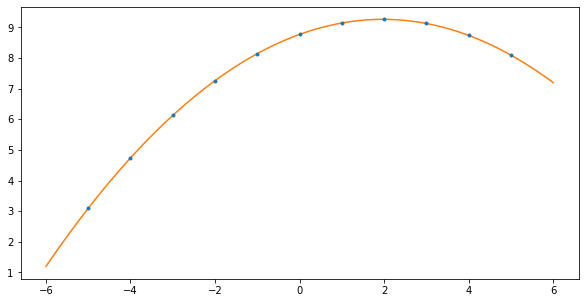

In [37]:
alpha_m = tr_alpha['mean']
beta1_m = tr_beta1['mean']
beta2_m = tr_beta2['mean']

xr = np.linspace(-6,6,100)
yr = alpha_m + beta1_m*xr + beta2_m*xr**2

f = plt.figure(figsize=(10,5))
plt.plot(xr,yr, c='C1')
plt.plot(x,y, 'C0.')

## Perturbed Dataset 

Let's modify the previous dataset by introducing some noise

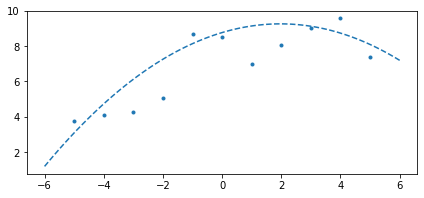

In [38]:

#print(y)
#tidx = int(np.floor(len(y)/2))
#print(tidx)

#print(y[0])
#print(type(y))

#yn = y.copy() 
#tidx = 0
#yn[tidx] = yn[tidx] + np.random.normal(0,2.)

yn += np.random.normal(0,.5, len(yn))

f = plt.figure(figsize=(7,3))
plt.plot(x,yn,'C0.')
plt.plot(xr,yr,'--')

In [40]:
with pm.Model() as model_poly:
  alpha = pm.Normal('alpha',mu=y.mean(),sigma=1) 
  beta1 = pm.Normal('beta1',mu=0.,sigma=1) 
  beta2 = pm.Normal('beta2',mu=0.,sigma=1) 
  epsilon = pm.HalfCauchy('epsilon', 5)

  mu = pm.Deterministic('mu',alpha + beta1*x + beta2*x*x)

  y_pred_per = pm.Normal('y_pred_per', mu=mu, sigma = epsilon, observed = yn)

  trace_poly_per = pm.sample(2000, tune = 2000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [epsilon, beta2, beta1, alpha]


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.


array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'epsilon'}>,
        <AxesSubplot:title={'center':'epsilon'}>],
       [<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>]], dtype=object)

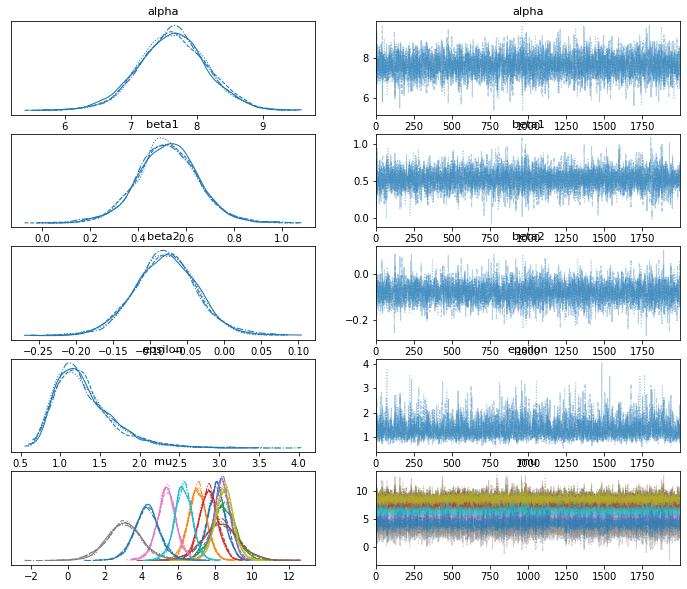

In [41]:
az.plot_trace(trace_poly_per)

In [42]:
res2 = az.summary(trace_poly_per)
print(res2)

          mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
alpha    7.638  0.519   6.691    8.655      0.008    0.006    4391.0   
beta1    0.522  0.129   0.283    0.770      0.002    0.001    4575.0   
beta2   -0.078  0.043  -0.154    0.006      0.001    0.000    3944.0   
epsilon  1.301  0.381   0.706    1.987      0.007    0.005    2693.0   
mu[0]    8.081  0.504   7.176    9.071      0.008    0.005    4373.0   
mu[1]    7.037  0.509   6.079    7.991      0.007    0.005    4633.0   
mu[2]    8.471  0.698   7.148    9.828      0.009    0.007    5548.0   
mu[3]    7.638  0.519   6.691    8.655      0.008    0.006    4391.0   
mu[4]    8.368  0.483   7.453    9.265      0.007    0.005    4790.0   
mu[5]    8.287  1.012   6.295   10.174      0.014    0.010    5102.0   
mu[6]    5.367  0.539   4.329    6.391      0.007    0.005    5958.0   
mu[7]    3.068  1.020   1.210    5.142      0.016    0.011    4383.0   
mu[8]    8.498  0.525   7.504    9.523      0.007    0.005    55

In [48]:
#az.plot_hdi(x,res2['mu'], color='k')
ppc = pm.sample_posterior_predictive(trace_poly_per, samples=4000, model=model_poly)


/Users/cfanelli/Desktop/teaching/BRDS/jupynb_env_new/lib/python3.9/site-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


<AxesSubplot:>

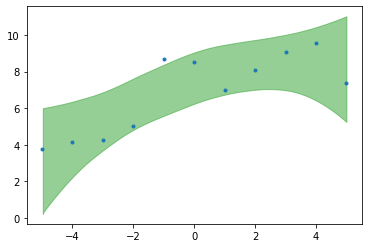

In [91]:
plt.plot(x,yn,'C0.')
az.plot_hdi(x,trace_poly_per.posterior['mu'],color='C2',hdi_prob=.99)